In [2]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from typing import Union

In [31]:
def generate_pie_chart(directory_path: Union[Path, str], title: str = ''):
    """
    Generate a pie chart representing the number of files in each subfolder.

    Args:
        directory_path (str or Path): Path to the directory containing subfolders.
    """
    directory_path = Path(directory_path)
    
    if not directory_path.is_dir():
        raise ValueError(f"The path {directory_path} is not a valid directory.")
    
    subfolder_file_counts = {}
    
    # Iterate through subfolders and count files
    for subfolder in directory_path.iterdir():
        if subfolder.is_dir():
            # Count files in the current subfolder
            file_count = sum(1 for file in subfolder.iterdir() if file.is_file())
            subfolder_file_counts[subfolder.name] = file_count
    
    if not subfolder_file_counts:
        raise ValueError("No subfolders found or subfolders are empty.")
    
    labels = list(subfolder_file_counts.keys())
    sizes = list(subfolder_file_counts.values())

    # Define a color mapping
    colors = [label for label in labels]
    
    plt.figure(figsize=(4, 4))
    plt.pie(sizes,
            labels=labels,
            colors=colors,
            autopct='%1.1f%%',
            startangle=0,
            wedgeprops={'edgecolor': 'black', 'linewidth': 2})
    plt.title(title)
    plt.axis('equal')
    plt.show()

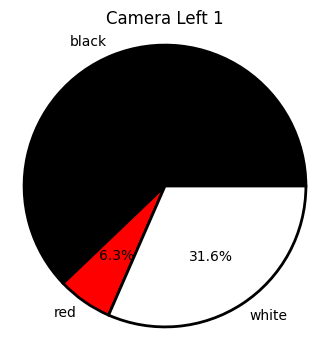

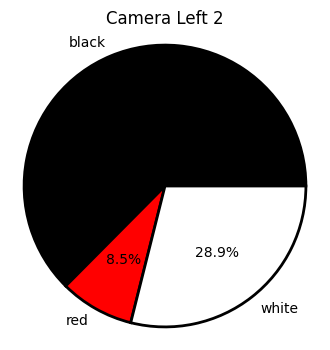

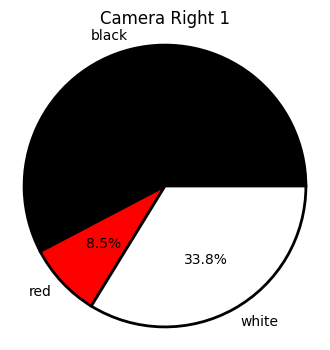

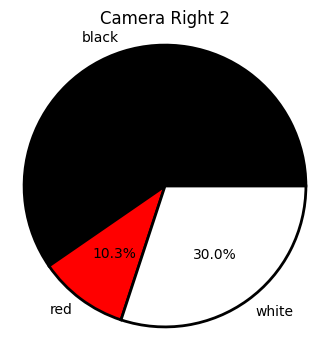

In [32]:
data_path = Path(os.environ.get('lear_wrinkles_data_path')) / 'camera_images'

folder_list = [
    'Camera Left 1',
    'Camera Left 2',
    'Camera Right 1',
    'Camera Right 2'
]

for folder in folder_list:
    generate_pie_chart(data_path / folder, folder)